# Part A: Classification Problem

* **Name** Acharya Atul
* **Matriculation Number** U1923502C
* **Email** atul001@e.ntu.edu.sg

# Question 4
>In this section, we will understand the utility of such a neural network in real world scenarios. 

### Install latest version of tensroflow

In [1]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-

### Neccessary Imports

* **pandas** - Data analysis and manipulation
* **matplotlib** - Plotting graphs and creating visuals
* **sklearn** - Basic data preprocessing, splitting dataset and cross validation
* **tensorflow** - Modeling neural networks and training them
* **shap** - Explaining model predictions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import shap

2022-10-10 12:28:37.389648: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 12:28:37.575219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-10 12:28:37.575263: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-10 12:28:37.616385: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to r

### Setting the seed for reproducability

>For this assignment we will be using 42 as the seed

In [3]:
SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

### Reading Dataset

In [4]:
df = pd.read_csv('../input/assignment/full.csv')
df['label'] = df['filename'].str.split('_').str[-2]
df.head()

,filename,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_var,chroma_cq_mean,chroma_cq_var,chroma_cens_mean,chroma_cens_var,...,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,label
0,app_3001_4001_phnd_neg_0000.wav,184.570312,623,69.222222,0.515281,0.093347,0.443441,0.082742,0.249143,0.021261,...,63.340282,1.811605,58.117188,-3.286546,54.268448,-2.719069,59.548176,-4.559987,70.774803,neg
1,app_3001_4001_phnd_neg_0001.wav,151.999081,521,74.428571,0.487201,0.094461,0.542182,0.073359,0.274423,0.008025,...,90.256195,1.573594,105.070496,-0.742024,82.417496,-1.961745,119.312355,1.513660,101.014572,neg
2,app_3001_4001_phnd_neg_0002.wav,112.347147,1614,146.727273,0.444244,0.099268,0.442014,0.083224,0.264430,0.013410,...,73.079750,0.202623,72.040550,-4.021009,73.844353,-5.916223,103.834824,-2.939086,113.598824,neg
3,app_3001_4001_phnd_neg_0003.wav,107.666016,2060,158.461538,0.454156,0.100834,0.424370,0.084435,0.257672,0.016938,...,93.791893,-0.429413,60.002579,-4.013513,82.544540,-5.858006,84.402092,0.686969,90.126389,neg
4,app_3001_4001_phnd_neg_0004.wav,75.999540,66,33.000000,0.478780,0.100000,0.414859,0.089313,0.252143,0.019757,...,64.973305,0.744403,68.908516,-6.354805,66.414391,-6.555534,47.852840,-4.809713,73.033966,neg


### Function to preprocess the dataset and split it into train and test

In [5]:

def split_dataset(df, columns_to_drop, test_size, random_state):
    label_encoder = preprocessing.LabelEncoder()

    df['label'] = label_encoder.fit_transform(df['label'])

    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)

    df_train2 = df_train.drop(columns_to_drop,axis=1)
    y_train2 = df_train['label'].to_numpy()

    df_test2 = df_test.drop(columns_to_drop,axis=1)
    y_test2 = df_test['label'].to_numpy() 

    return df_train2, y_train2, df_test2, y_test2

### Function to appropriately scale the dataset

In [6]:
def preprocess_dataset(df_train, df_test):

    standard_scaler = preprocessing.StandardScaler()
    df_train_scaled = standard_scaler.fit_transform(df_train)

    df_test_scaled = standard_scaler.transform(df_test)

    return df_train_scaled, df_test_scaled

### Preprocess and split the dataset

In [7]:
columns_to_drop = ['label','filename']

X_train, y_train, X_test, y_test = split_dataset(df, columns_to_drop, test_size=0.3, random_state=0) # positive labels being encoded as 1

### Set hyperparameters
* Optimal values for hidden layer size and batch size were found using hyperparameter tuning 

In [8]:
num_epochs = 100

optimal_hidden_size = 256

optimal_batch_size = 512

### Create model architecture based on specifications

In [9]:
def create_model(input_shape, hidden_layer_size):
    
    num_neurons = 128
    
    model = Sequential([
        InputLayer(input_shape=(input_shape,)),
        Dense(hidden_layer_size, activation='relu'),
        Dropout(0.2),
        Dense(num_neurons, activation='relu'),
        Dropout(0.2),
        Dense(num_neurons, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.001)

    model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    
    return model

### Train Model
> **Note**: The model is being retrained since the weights were not saved from Question 3

In [10]:
X_train_scaled, X_test_scaled = preprocess_dataset(X_train, X_test)

input_shape = X_train.shape[1]

model = create_model(input_shape, optimal_hidden_size)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
    
history = model.fit(X_train_scaled, y_train,
                    epochs=num_epochs,
                    verbose=1,
                    batch_size=optimal_batch_size,
                    use_multiprocessing=False,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping_callback] 
                )

2022-10-10 12:28:52.684429: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-10 12:28:52.684518: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-10 12:28:52.684552: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0bb7768fabc): /proc/driver/nvidia/version does not exist
2022-10-10 12:28:52.685036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enabl

Epoch 1/100
250/250 [==============================] - 3s 10ms/step - loss: 0.6899 - accuracy: 0.5350 - val_loss: 0.6844 - val_accuracy: 0.5510
Epoch 2/100
250/250 [==============================] - 2s 9ms/step - loss: 0.6831 - accuracy: 0.5524 - val_loss: 0.6804 - val_accuracy: 0.5623
Epoch 3/100
250/250 [==============================] - 3s 11ms/step - loss: 0.6795 - accuracy: 0.5625 - val_loss: 0.6792 - val_accuracy: 0.5618
Epoch 4/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6755 - accuracy: 0.5710 - val_loss: 0.6746 - val_accuracy: 0.5713
Epoch 5/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6714 - accuracy: 0.5788 - val_loss: 0.6710 - val_accuracy: 0.5795
Epoch 6/100
250/250 [==============================] - 3s 10ms/step - loss: 0.6670 - accuracy: 0.5850 - val_loss: 0.6676 - val_accuracy: 0.5852
Epoch 7/100
250/250 [==============================] - 2s 9ms/step - loss: 0.6615 - accuracy: 0.5947 - val_loss: 0.6621 - val_accuracy: 0

### Part A
>Record yourself with a wav file using (https://voice-recorder-online.com/) for 5
seconds, either in a positive or a negative manner. Preprocess the data using the
provided preprocessing script (data_preprocess.ipynb) and prepare the dataset. 

In [11]:
import IPython

audio_file = "../input/assignment/record.wav"
IPython.display.Audio(audio_file)

### Preprocess the audio

In [12]:
import librosa
import soundfile as sf

import numpy as np
import pandas as pd

import os
from os import listdir
from os.path import isfile, join

from collections import OrderedDict

import json

def extract_features(filepath):
    
    '''
    Source: https://github.com/danz1ka19/Music-Emotion-Recognition/blob/master/Feature-Extraction.py
    Modified to process a single file

        function: extract_features
        input: path to mp3 files
        output: csv file containing features extracted

        This function reads the content in a directory and for each audio file detected
        reads the file and extracts relevant features using librosa library for audio
        signal processing
    '''

    feature_set = {}  # Features

    # Reading audio file
    y, sr = librosa.load(filepath)
    S = np.abs(librosa.stft(y, n_fft=512)) 
    # https://librosa.org/doc/main/generated/librosa.stft.html (set 512 for speech processing)

    # Extracting Features
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=512)
    
    chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
    
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=512)
    rmse = librosa.feature.rms(y=y)[0]
    cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=512)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=512)
    contrast = librosa.feature.spectral_contrast(S=S, sr=sr, n_fft=512)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=512)
    poly_features = librosa.feature.poly_features(S=S, sr=sr, n_fft=512)
    
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    
    zcr = librosa.feature.zero_crossing_rate(y)
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=512)
    mfcc_delta = librosa.feature.delta(mfcc)

    onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
    frames_to_time = librosa.frames_to_time(onset_frames[:20], sr=sr)

    # Concatenating Features into one csv and json format
    feature_set['filename'] = filepath  # song name
    feature_set['tempo'] = tempo  # tempo 
    feature_set['total_beats'] = sum(beats)  # beats
    feature_set['average_beats'] = np.average(beats)
    feature_set['chroma_stft_mean'] = np.mean(chroma_stft)  # chroma stft
    feature_set['chroma_stft_var'] = np.var(chroma_stft)
    
    feature_set['chroma_cq_mean'] = np.mean(chroma_cq)  # chroma cq
    feature_set['chroma_cq_var'] = np.var(chroma_cq)
    
    feature_set['chroma_cens_mean'] = np.mean(chroma_cens)  # chroma cens
    feature_set['chroma_cens_var'] = np.var(chroma_cens)
    feature_set['melspectrogram_mean'] = np.mean(melspectrogram)  # melspectrogram
    feature_set['melspectrogram_var'] = np.var(melspectrogram)
    feature_set['mfcc_mean'] = np.mean(mfcc)  # mfcc
    feature_set['mfcc_var'] = np.var(mfcc)
    feature_set['mfcc_delta_mean'] = np.mean(mfcc_delta)  # mfcc delta
    feature_set['mfcc_delta_var'] = np.var(mfcc_delta)
    feature_set['rmse_mean'] = np.mean(rmse)  # rmse
    feature_set['rmse_var'] = np.var(rmse)
    feature_set['cent_mean'] = np.mean(cent)  # cent
    feature_set['cent_var'] = np.var(cent)
    feature_set['spec_bw_mean'] = np.mean(spec_bw)  # spectral bandwidth
    feature_set['spec_bw_var'] = np.var(spec_bw)
    feature_set['contrast_mean'] = np.mean(contrast)  # contrast
    feature_set['contrast_var'] = np.var(contrast)
    feature_set['rolloff_mean'] = np.mean(rolloff)  # rolloff
    feature_set['rolloff_var'] = np.mean(rolloff)
    feature_set['poly_mean'] = np.mean(poly_features)  # poly features
    feature_set['poly_var'] = np.mean(poly_features)
    
    feature_set['tonnetz_mean'] = np.mean(tonnetz)  # tonnetz
    feature_set['tonnetz_var'] = np.var(tonnetz)
    
    feature_set['zcr_mean'] = np.mean(zcr)  # zero crossing rate
    feature_set['zcr_var'] = np.var(zcr)
    feature_set['harm_mean'] = np.mean(harmonic)  # harmonic
    feature_set['harm_var'] = np.var(harmonic)
    feature_set['perc_mean'] = np.mean(percussive)  # percussive
    feature_set['perc_var'] = np.var(percussive)
    feature_set['frame_mean'] = np.mean(frames_to_time)  # frames
    feature_set['frame_var'] = np.var(frames_to_time)
    
    for ix, coeff in enumerate(mfcc):
        feature_set['mfcc' + str(ix) + '_mean'] = coeff.mean()
        feature_set['mfcc' + str(ix) + '_var'] = coeff.var()
    
    return feature_set


new_features_dict = extract_features(audio_file)
my_audio = pd.DataFrame([new_features_dict])

### Check my audio after preprocessing

In [13]:
my_audio = my_audio.drop(['filename'], axis=1)
my_audio.head()

,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_var,chroma_cq_mean,chroma_cq_var,chroma_cens_mean,chroma_cens_var,melspectrogram_mean,...,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var
0,151.999081,151,50.333333,0.513131,0.095119,0.510563,0.086754,0.268774,0.011094,0.127247,...,-1.921726,50.451771,-6.552086,77.830872,-3.152155,56.028191,-6.653245,68.584099,-0.962322,57.110214


### Scale the audio features appropriately

In [14]:
_, my_audio_scaled = preprocess_dataset(X_train, my_audio)

### Part B
>Do a model prediction on your sample test dataset and obtain the predicted label
using a threshold of 0.5. The model used is the optimized pretrained model using the
selected optimal batch size and optimal number of neurons. 

In [15]:
prediction = model.predict(my_audio_scaled)
print(prediction)

1/1 [==============================] - 0s 113ms/step
[[0.5167121]]


In [16]:
label = prediction > 0.5
print(label)

[[ True]]


### Part C
>Find the most important features on the model prediction for your test sample
using SHAP. Plot the local feature importance with a force plot and explain your
observations. 

In [17]:
%%time
explainer = shap.DeepExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(my_audio_scaled)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


CPU times: user 6.4 s, sys: 4.47 s, total: 10.9 s
Wall time: 3.92 s


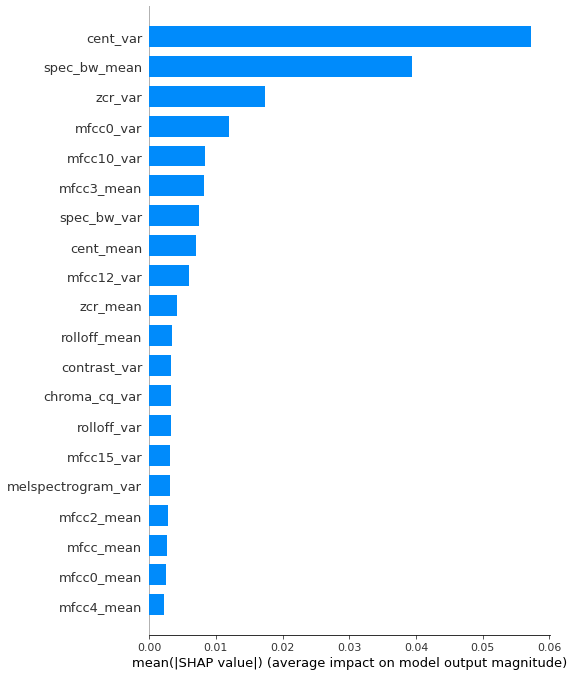

In [18]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = my_audio.columns)

### Observations
* The most important features are ***cent_var***, ***spec_bw_mean***, and ***mfcc0_var***

In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = my_audio.columns)

### Observations
>The bold number is the model’s score for this observation. The features that were important to making the prediction for this observation are shown in red and blue, with red representing features that pushed the model score higher, and blue representing features that pushed the score lower. Features that had more of an impact on the score are located closer to the dividing boundary between red and blue, and the size of that impact is represented by the size of the bar.

* From this we can tell that ***cent_var*** and the other features in blue tried to push the model to predict negative whereas **spec_bw_mean**, **mfcc0_var** and the other features in red tried to push the model to predict positive.